In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from glob import glob
from os import path

In [46]:
df = pd.read_csv(path.join("..", "from_arc", "rad_tib_cv.csv"))
df = df[["label", "version", "fold", "metrics_val_dsc_0_epoch_final", "metrics_val_dsc_1_epoch_final"]]
df = df.groupby(["label", "version"]).mean().drop(columns=["fold"])
df = df[
    df.groupby(["label"])["metrics_val_dsc_0_epoch_final"].transform(max) 
    == df["metrics_val_dsc_0_epoch_final"]
].dropna()
df = df.reset_index()
df

,label,version,metrics_val_dsc_0_epoch_final,metrics_val_dsc_1_epoch_final
0,segan_3d_cv,20956375,0.952362,0.966265
1,segresnetvae_3d_cv,20956391,0.942883,0.954787
2,unet_3d_cv,20956405,0.943344,0.955065
3,unetpp_3d_cv,20956431,0.951149,0.969514
4,unetr_3d_cv,20956455,0.945831,0.956134


In [47]:
df["label"] = df["label"].apply(lambda x: x[0:-6])

labels_renaming = {
    "unet": "UNet",
    "unetpp": "UNet++",
    "unetr": "UNETR",
    "segresnetvae": "SegResNetVAE",
    "segan": "SeGAN"
}
df = df.replace({"label": labels_renaming})

df = df.rename(
    columns = {
        "metrics_val_dsc_0_epoch_final": "cort DSC",
        "metrics_val_dsc_1_epoch_final": "trab DSC"
    }
)

In [48]:
df

,label,version,cort DSC,trab DSC
0,SeGAN,20956375,0.952362,0.966265
1,SegResNetVAE,20956391,0.942883,0.954787
2,UNet,20956405,0.943344,0.955065
3,UNet++,20956431,0.951149,0.969514
4,UNETR,20956455,0.945831,0.956134


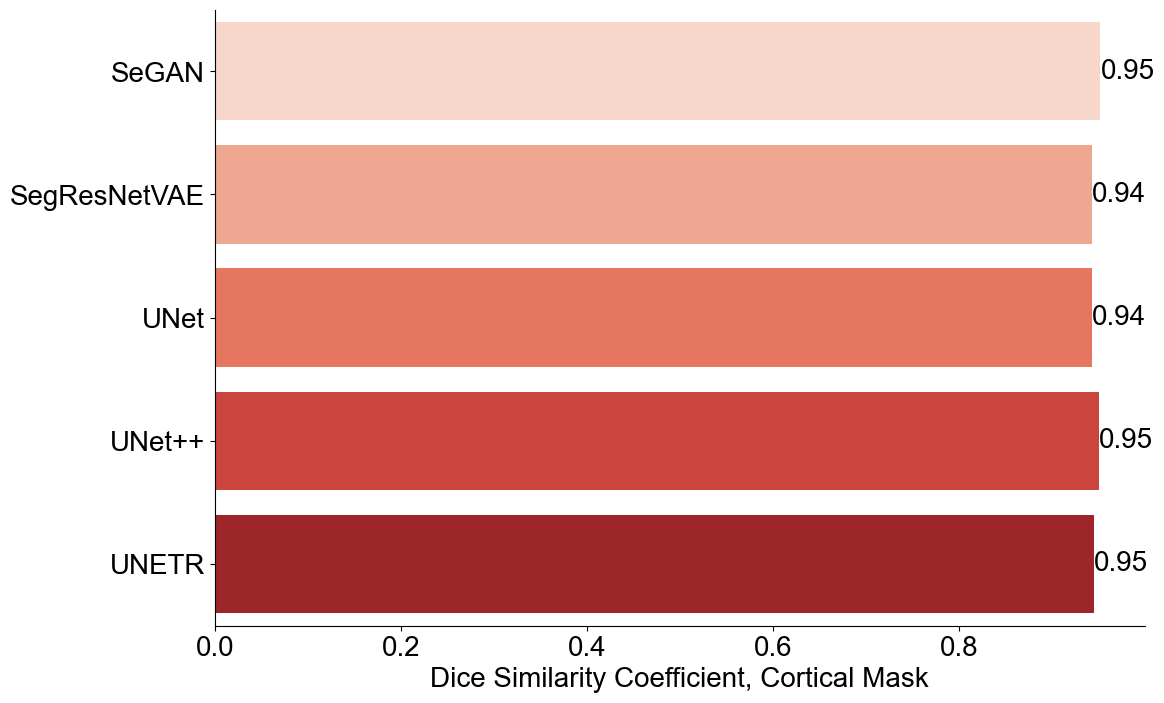

In [50]:
rc = {'figure.figsize':(10,5),
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '1',
      'font.family':'Arial',
      'font.size' : 20}
plt.rcParams.update(rc)

plt.rcParams.update(rc)

plt.figure(figsize=(12,8))

ax = sns.barplot(data=df, y="label", x="cort DSC", palette="Reds")
# plt.legend(loc="lower left")

ax.set(
    ylabel="",
    xlabel="Dice Similarity Coefficient, Cortical Mask"
)

for i in ax.containers:
    ax.bar_label(i, fmt="%0.2f")

plt.grid(axis="x")
sns.despine()

plt.show()